# **CSE 344 - Computer Vision : Assignment 1**
**Name :** Arka Sarkar <br>
**Roll Number :** 2018222 <br>

Importing the dependencies

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import filters
from collections import deque
import copy
from itertools import product

### Question 1 
Find tightest bounding circles for the objectspresentin the given image.[3 Marks] <br>
**Expected O/Ps**: centers & radiuses of those circles, and a visualization showing both the objects and the circles in a singleimage.0.25 marks for the center[0.15] andthe radius[0.1] for any object . [0.75] marks for the is ualization. <br>

Loading the RBG **Project1.png** image to work upon which shape (639,960,3)

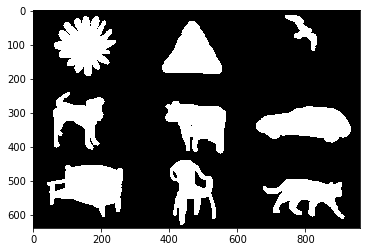

(639, 960, 3)


In [13]:
image = cv2.imread("Project1.png")
plt.imshow(image)
plt.show()
print(image.shape)

### **Connected Components**

The first part of drawing the bounding circles, is to detect the total number of connected components(objects). <br>

**Algorithm :**
* Convert the RBG image into a grayscale image.
* Apply otsu on the grayscale image and segment it into a binary image, where 1 is foreground and 0 is background.
* A counter that maintains the number of connected components found.
* Iterate through the rows and columns of the binary image and for every not visited pixel in the image mark it visited and interate through all the connected neighbours that are marked as 1 and not visited, and increment the counter. 
* Save the pixels for each connected component separately and return it along with the max number that the counter achieved. 

In [14]:
def get_components(image):
    gray_img = np.mean(image,2)
    val = filters.threshold_otsu(gray_img)
    gray_img[gray_img >= val] = 1
    gray_img[gray_img < val] = 0
    
    rows, cols = gray_img.shape[0], gray_img.shape[1]
    visited = np.zeros((rows,cols))

    answer = np.zeros((rows,cols))
    centers = {}
    c = 1
    for i in range(rows):
        for j in range(cols):

            if(gray_img[i][j] == 0.0):
                visited[i,j] = 1
            elif(visited[i,j]):
                continue
            else:
                stack = deque()
                stack.append((i,j))
                
                centers[c] = []
                
                while(len(stack)!=0):
                    curr = stack.pop()
                    if(visited[curr[0],curr[1]] == 0):
                        visited[curr[0],curr[1]] = 1
                        m,n = curr[0],curr[1]
                        answer[m,n] = c
                        list_ = []
                        for x in range(m-1, m+2):
                            for y in range(n-1, n+2):
                                if(x == m and y == n):
                                    continue
                                else:
                                    if(x <0 or x > rows -1):
                                        continue
                                    if(y <0 or y > cols -1):
                                        continue

                                    if(gray_img[x,y] == 1.0):
                                        centers[c].append((x,y))
                                        stack.append((x,y))
                c = c + 1


    return np.amax(answer), centers


### **Draw Bounding Circles**
The next part of is to compute the radius and the center of all the connected components, from the pixels of each component recieved from the above function. 

In [4]:
def get_bounding_circles(image):
    
    n, centers = get_components(image)
    
    centers_radius = {}
    for key in list(centers.keys()):
        arr = np.array(centers[key])
        center_x, center_y = np.mean(arr,0)
        radius = max((np.max(arr[:,0]) - np.min(arr[:,0]))/2, (np.max(arr[:,1]) - np.min(arr[:,1]))/2)
        centers_radius[key] = {"center_coordinates" : (int(center_y), int(center_x)), "radius": int(radius)}
        print("centre coordinates for object ",str(key),": ", "(", int(center_y), int(center_x), ")", "radius : ",int(radius) )
    
    curr_image = copy.deepcopy(image)
    for key in list(centers_radius.keys()):
        
        color = (255, 0, 0)
        
        thickness = 2
        curr_image = cv2.circle(curr_image, centers_radius[key]["center_coordinates"], centers_radius[key]["radius"], color, thickness)
        font = cv2.FONT_HERSHEY_SIMPLEX 
        fontScale = 1
        curr_image = cv2.putText(curr_image, str(key), centers_radius[key]["center_coordinates"], font, fontScale, color, thickness, cv2.LINE_AA) 
    
    cv2.imwrite("bounding_image.jpg", curr_image)
    fig = plt.figure(figsize = (10,10))
    plt.imshow(curr_image)
    plt.show()
    
    return centers_radius

centre coordinates for object  1 :  ( 793 59 ) radius :  53
centre coordinates for object  2 :  ( 151 101 ) radius :  91
centre coordinates for object  3 :  ( 468 128 ) radius :  88
centre coordinates for object  4 :  ( 133 315 ) radius :  85
centre coordinates for object  5 :  ( 486 332 ) radius :  89
centre coordinates for object  6 :  ( 803 333 ) radius :  140
centre coordinates for object  7 :  ( 461 521 ) radius :  94
centre coordinates for object  8 :  ( 168 515 ) radius :  112
centre coordinates for object  9 :  ( 803 541 ) radius :  120


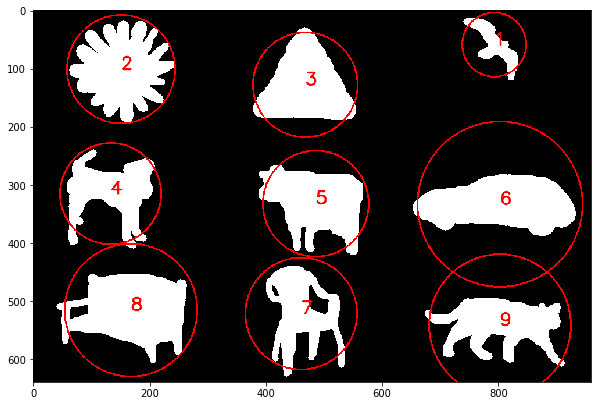

In [5]:
center_radius = get_bounding_circles(image)

### Question 2
Find Jaccard Similarity scores for each of the objects in the image given with respect to their corresponding circular regions obtained in Q1.[2 Marks] <br>
[0.65] marks for implementing the Jaccard Similarity module that takes two binary masks as inputs and outputs the required score.[0.15] marks for Jaccard Similarity score for any object. 

In [6]:
def jaccard_similarity(binary_mask1, binary_mask2):
    intersection = len(list(set(binary_mask1).intersection(set(binary_mask2))))
    union = len(set(binary_mask1).union(set(binary_mask2)))
    return float(intersection) / union
    

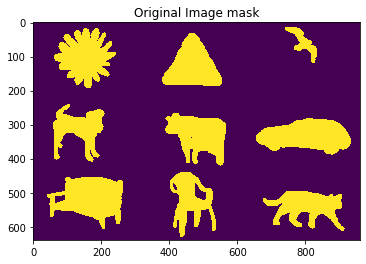

In [7]:
gray_img = np.mean(image,2)
val = filters.threshold_otsu(gray_img)
gray_img[gray_img >= val] = 1
gray_img[gray_img < val] = 0
plt.imshow(gray_img)
plt.title("Original Image mask")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


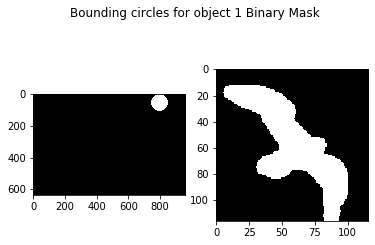

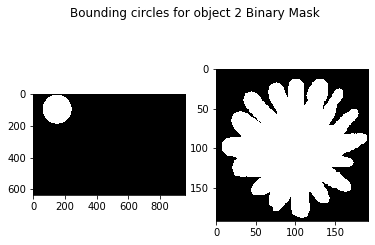

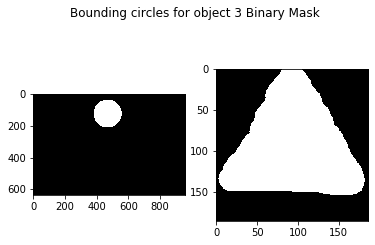

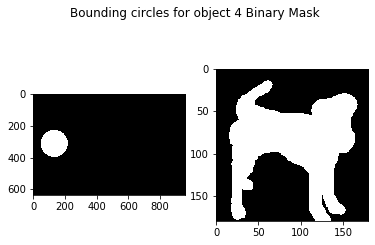

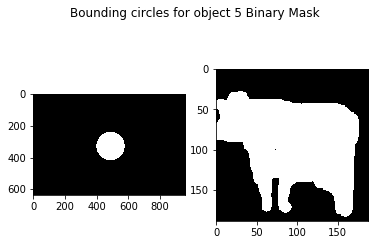

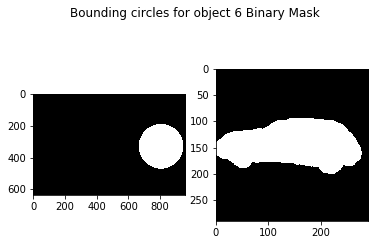

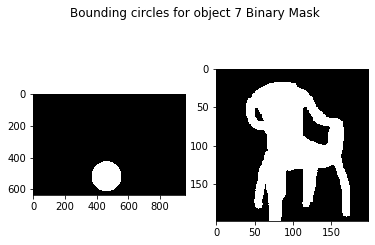

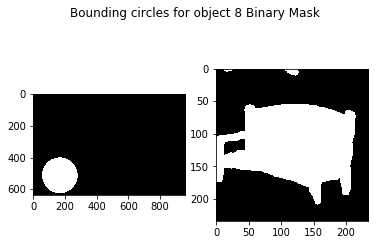

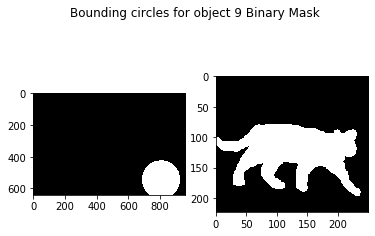

In [8]:
n, centers = get_components(image)
centers_radius = {}
for key in list(centers.keys()):
    arr = np.array(centers[key])
    center_x, center_y = np.mean(arr,0)
    radius = max((np.max(arr[:,0]) - np.min(arr[:,0]))/2, (np.max(arr[:,1]) - np.min(arr[:,1]))/2)
    centers_radius[key] = {"center_coordinates" : (int(center_y), int(center_x)), "radius": int(radius)}
#     print("centre coordinates : ", "(", int(center_y), int(center_x), ")", "radius : ",int(radius) )

circles = {}
for key in list(centers_radius.keys()):
    curr_image = copy.deepcopy(image)
    curr_image = np.zeros(curr_image.shape)
    color = (255, 255, 255)
    thickness = -1
    y,x = center_radius[key]["center_coordinates"]
    radius = centers_radius[key]["radius"] + 5
    curr_image = cv2.circle(curr_image, centers_radius[key]["center_coordinates"], centers_radius[key]["radius"], color, thickness)
#     curr_image = np.mean(curr_image,2)
#     curr_image = curr_image[x - radius : x + radius , y - radius : y + radius]
    circles[key] = curr_image
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle("Bounding circles for object " + str(key) + " Binary Mask")
    ax1.imshow(curr_image)
    ax2.imshow(image[x - radius : x + radius , y - radius : y + radius])

In [9]:
def points_in_circle_np(radius, x0=0, y0=0, ):
    x_ = np.arange(x0 - radius - 1, x0 + radius + 1, dtype=int)
    y_ = np.arange(y0 - radius - 1, y0 + radius + 1, dtype=int)
    x, y = np.where((x_[:,np.newaxis] - x0)**2 + (y_ - y0)**2 <= radius**2)
    # x, y = np.where((np.hypot((x_-x0)[:,np.newaxis], y_-y0)<= radius)) # alternative implementation
    list_ = []
    for x, y in zip(x_[x], y_[y]):
        list_.append((x,y))
    return list_

In [10]:
def get_jaccard_similarity(image, circles):
    n, centers = get_components(image)
    centers_radius = {}
    for key in list(centers.keys()):
        arr = np.array(centers[key])
        center_x, center_y = np.mean(arr,0)
        radius = max((np.max(arr[:,0]) - np.min(arr[:,0]))/2, (np.max(arr[:,1]) - np.min(arr[:,1]))/2)
        centers_radius[key] = {"center_coordinates" : (int(center_y), int(center_x)), "radius": int(radius)}
        
    circle_coordinates = {}
    for key in list(center_radius.keys()):
        radius = center_radius[key]["radius"]
        y,x = center_radius[key]["center_coordinates"]
#         n, centers_r = get_components(circles[key])
#         circle_coordinates[key] = centers_r[1]
        circle_coordinates[key] = points_in_circle_np(radius,x,y)
        IOU = jaccard_similarity(centers[key], circle_coordinates[key])
        print("The IOU (jaccard similarity) score for object ", str(key) ,"  is : ", IOU)
    return circle_coordinates, centers
                

The IOU (jaccard similarity) score for object  1   is :  0.31282416353096715
The IOU (jaccard similarity) score for object  2   is :  0.7108704460898073
The IOU (jaccard similarity) score for object  3   is :  0.6191863808903033
The IOU (jaccard similarity) score for object  4   is :  0.48961881589618816
The IOU (jaccard similarity) score for object  5   is :  0.5993872503783544
The IOU (jaccard similarity) score for object  6   is :  0.31881044639763095
The IOU (jaccard similarity) score for object  7   is :  0.42577659827838454
The IOU (jaccard similarity) score for object  8   is :  0.49704413290543636
The IOU (jaccard similarity) score for object  9   is :  0.32000085282391316


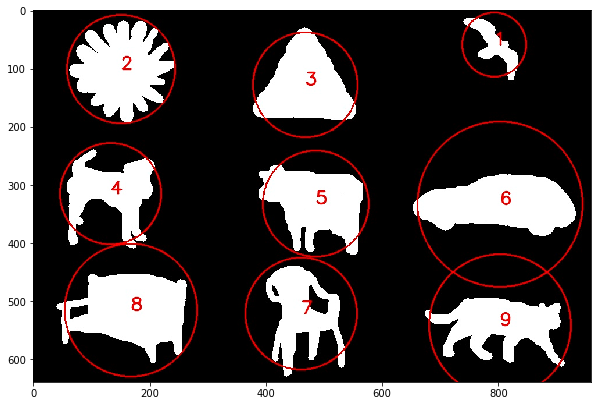

In [11]:
circle_coordinates,centers = get_jaccard_similarity(image,circles)
bounding_image = cv2.imread("bounding_image.jpg")
plt.figure(figsize = (10,10))
plt.imshow(bounding_image)
plt.show()